<center><h3> Домашнее задание 4: Таблицы сопряженности </h3></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv("games.csv")
data = data.set_index("Name")
data.index.name = None
data

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Wii Sports,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
Super Mario Bros.,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
Mario Kart Wii,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
Wii Sports Resort,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
Pokemon Red/Pokemon Blue,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
Crash Bandicoot 2: Cortex Strikes Back,96,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
Super Mario Bros. 2,97,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
Super Smash Bros. for Wii U and 3DS,98,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
Call of Duty: World at War,99,X360,2008.0,Shooter,Activision,4.79,1.90,0.00,0.69,7.37


<center><h3> Сформируем три номинальных признака: </h3></center>

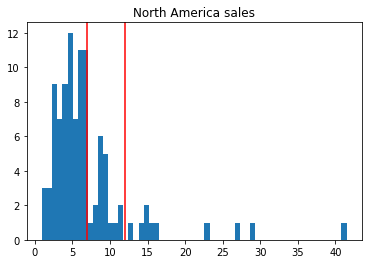

In [3]:
f6 = data.iloc[:, 5] # Выберем 6 признак
plt.hist(f6, 60) # Построим гистограмму
plt.axvline(12, c='r') #Проведём черту
plt.axvline(7, c='r')
plt.title("North America sales") # Заголовок графика
plt.show()

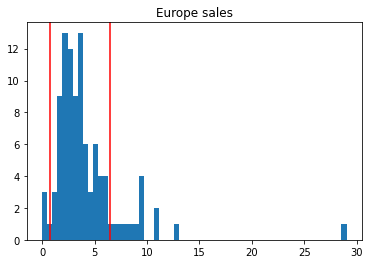

In [4]:
f7 = data.iloc[:, 6]
plt.hist(f7, 60)
plt.axvline(0.8, c='r')
plt.axvline(6.5, c='r')
plt.title("Europe sales")
plt.show()

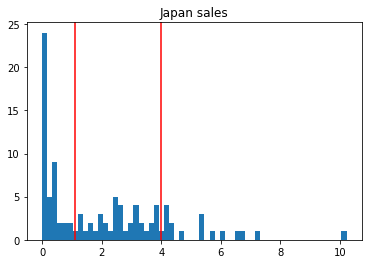

In [5]:
f8 = data.iloc[:, 7]
plt.hist(f8, 60)
plt.axvline(1.1, c='r')
plt.axvline(4, c='r')
plt.title("Japan sales")
plt.show()

<center><h3> Начнём работу с матрицами: </h3></center>

Получим 3 признака и построим нужные нам таблицы сопряжённости (x1 и x2, x1 и x3):

In [6]:
x1 = f6_cut = pd.cut(f6, [0, 7, 12, 45], labels=['A1', 'A2', 'A3'])
x2 = f7_cut = pd.cut(f7, [0, 0.8, 6.5, 30], labels=['E1', 'E2', 'E3'])
x3 = f8_cut = pd.cut(f8, [0, 1.1, 4, 15], labels=['J1', 'J2', 'J3'])

In [7]:
crosstab_x2 = pd.crosstab(x1, x2, margins=True)
crosstab_x2

EU_Sales,E1,E2,E3,All
NA_Sales,,,,
A1,1,68,1,70
A2,2,11,7,20
A3,1,4,5,10
All,4,83,13,100


In [8]:
crosstab_x3 = pd.crosstab(x1, x3, margins=True)
crosstab_x3

JP_Sales,J1,J2,J3,All
NA_Sales,,,,
A1,29,30,8,67
A2,10,4,5,19
A3,2,5,3,10
All,41,39,16,96


Так выглядит первый признак (продажи игр в США), для которого будем строить зависимости:

In [9]:
x1

Wii Sports                                A3
Super Mario Bros.                         A3
Mario Kart Wii                            A3
Wii Sports Resort                         A3
Pokemon Red/Pokemon Blue                  A2
                                          ..
Crash Bandicoot 2: Cortex Strikes Back    A1
Super Mario Bros. 2                       A1
Super Smash Bros. for Wii U and 3DS       A1
Call of Duty: World at War                A1
Battlefield 3                             A1
Name: NA_Sales, Length: 100, dtype: category
Categories (3, object): ['A1' < 'A2' < 'A3']

Построим матрицы условных вероятностей для признаков (x1 от x2) и (x1 от x3):

In [10]:
np.divide(crosstab_x2, crosstab_x2[-1:]).round(2)

EU_Sales,E1,E2,E3,All
NA_Sales,,,,
A1,0.25,0.82,0.08,0.7
A2,0.50,0.13,0.54,0.2
A3,0.25,0.05,0.38,0.1
All,1.00,1.00,1.00,1.0


Из таблицы видно, что при E2 с большой вероятностью будет верно __A1: E2 -> A1__. Выходит, что при умеренном количестве продаж в Европе, в США продажи вероятно будут сниженными, однако если смотреть именно на количество, то оно примерно одинаковое.

Также видим, что __E3 -> not A1__. То есть, если в Европе продажи повышенные, то в США совсем с маленькой вероятностью они будут пониженными. Можно ещё выделить, что __E2 -> not A3__: умеренные продажи в Европе, скорее, показывают, что повышенные продажи в США будут отсутствовать.

In [11]:
np.divide(crosstab_x3, crosstab_x3[-1:]).round(2)

JP_Sales,J1,J2,J3,All
NA_Sales,,,,
A1,0.71,0.77,0.50,0.7
A2,0.24,0.10,0.31,0.2
A3,0.05,0.13,0.19,0.1
All,1.00,1.00,1.00,1.0


__J2 -> A1; J1 -> A1__: пониженные или умеренные продажи в Японии с большой вероятностью указывают на то, что в США тоже будет небольшое количество продаж.

__J1 -> not A3__: если в Японии мало продаж, то в США с большой вероятностью не будет их в повышенном количестве.

In [12]:
relfreq_x2 = pd.crosstab(x1, x2, margins=True, normalize=True)
relfreq_x3 = pd.crosstab(x1, x3, margins=True, normalize=True)

relfreq_indep_x2 = np.dot(
    relfreq_x2.iloc[:, -1].values[:, None],
    relfreq_x2.iloc[-1, :].values[None, :],
)

relfreq_indep_x3 = np.dot(
    relfreq_x3.iloc[:, -1].values[:, None],
    relfreq_x3.iloc[-1, :].values[None, :],
)

Матрица индексов Кетле __в процентах__ для признака х2:

In [27]:
quetelet_x2 = relfreq_x2 / relfreq_indep_x2 - 1
quetelet_x2 = quetelet_x2.iloc[:-1, :-1].round(2)
quetelet_x2*100

EU_Sales,E1,E2,E3
NA_Sales,,,
A1,-64.0,17.0,-89.0
A2,150.0,-34.0,169.0
A3,150.0,-52.0,285.0


Из неё видно, что при __E1 -> A2__, A3 на 150% чаще, чем в среднем. Очень интересно, что при низких продажах в Европе большое количество продаж в США встречается чаще, чем обычно.

Также видим, что __E3 -> A3__: это уже вполне логично, что при очень больших продажах в Европе почти гарантированы большие продажи в США.

Матрица индексов Кетле __в процентах__ для признака х3:

In [14]:
quetelet_x3 = relfreq_x3 / relfreq_indep_x3 - 1
quetelet_x3 = quetelet_x3.iloc[:-1, :-1].round(2)
quetelet_x3*100

JP_Sales,J1,J2,J3
NA_Sales,,,
A1,1.0,10.0,-28.0
A2,23.0,-48.0,58.0
A3,-53.0,23.0,80.0


__J3 -> A3__, то есть при повышенных продажах в Японии на 80% чаще будут больше продажи в США, чем в среднем. Это действительно не было видно из матрицы с условными вероятностями.

Посчитаем средние индексы Кетле:

In [28]:
Q_x2 = np.sum((relfreq_x2.iloc[:-1, :-1] * quetelet_x2).values).round(4) * 100
print("В среднем, знание признака x2 помогает определить признак х1 точнее на " + str(Q_x2) + "%")

В среднем, знание признака x2 помогает определить признак х1 точнее на 34.79%


In [29]:
Q_x3 = np.sum((relfreq_x3.iloc[:-1, :-1] * quetelet_x3).values).round(4) * 100
print("В среднем, знание признака x3 помогает определить признак х1 точнее на " + str(Q_x3) + "%")

В среднем, знание признака x3 помогает определить признак х1 точнее на 7.1%


Можно сделать вывод, что продажи игр в Европе сильнее связаны с продажами игр в США, чем продажи игр в Японии. Это вполне верно, потому что рынок Японии в некоторой степени специфичен. В Японии большим спросом пользуются игры, непопулярные в США и Европе, а также иногда и другие жанры. Более того, не все игры сразу начинают продавать по всех регионах, иногда может быть задержка, которая снижает количество покупок.

Посчитаем значения коэффициента __хи-квадрат__ для таблиц:

In [17]:
h_x2 = ((relfreq_x2 - relfreq_indep_x2)**2 / relfreq_indep_x2).iloc[:-1, :-1]

In [18]:
np.sum(h_x2.values).round(4)

0.3485

Возьмём модуль разницы. Видим, что разница незначительная:

In [23]:
np.abs(Q_x2 / 100 - np.sum(h_x2.values).round(4))

5.551115123125783e-17

С признаком х3 видим, что разница тоже маленькая:

In [32]:
h_x3 = ((relfreq_x3 - relfreq_indep_x3)**2 / relfreq_indep_x3).iloc[:-1, :-1]

In [33]:
np.sum(h_x3.values).round(4)

0.0726

In [21]:
np.abs(Q_x3 / 100 - np.sum(h_x3.values).round(4))

0.0016000000000000042

Они должны быть равны, но незначительно отличаются, так как я округлял значения в разные моменты для удобства интерпретации.